# VK Project
### Network Science, Amantur Amatov


### Analyze graph structure

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap


In [ ]:
g = nx.read_gexf('friend_list.gexf')
largest_component = max(nx.connected_components(g), key=len)
lc = g.subgraph(largest_component).copy()

In [ ]:
list(g.nodes())[:10]

['368567',
 '2153814',
 '2352276',
 '4166562',
 '6132074',
 '8469731',
 '8490302',
 '11094314',
 '12891165',
 '13365622']

#### Centralities

In [ ]:
def centralities(G):

    degree = nx.degree_centrality(G)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    return {"degree": np.array(list(degree.values())),
            "closeness": np.array(list(closeness.values())),
            "betweenness": np.array(list(betweenness.values()))}

In [ ]:

def my_colormap(name_cmap, alpha):
  cmap = plt.get_cmap(name_cmap)
  my_cmap = cmap(np.arange(cmap.N))
  my_cmap[:,-1] = np.linspace(alpha, 1, cmap.N)
  my_cmap = ListedColormap(my_cmap)
  return my_cmap
def pos_layout(g):
  df = pd.DataFrame(index=g.nodes(), columns=g.nodes())
  for row, data in nx.shortest_path_length(g):
      for col, dist in data.items():
          df.loc[row,col] = dist

  df = df.fillna(df.max().max())
  return df

In [ ]:
cntrs = centralities(g)

In [ ]:
import ast

def top10_centralities(G):
    r = {}
    for n, f in zip(["degree", "betweenness", "closeness"],[nx.degree_centrality, nx.closeness_centrality, nx.betweenness_centrality]):
        sort = sorted(list(f(G).items()), key=lambda x:x[1], reverse=True)
        ids, centrality = zip(*sort)
        friend_names = [nx.get_node_attributes(G, 'name')[y] for y in ids]
        friend_sex = [nx.get_node_attributes(G, 'sex')[y] for y in ids]
        
        friend_country = [ast.literal_eval(nx.get_node_attributes(G, 'country')[y])['title']
                          if y in nx.get_node_attributes(G, 'country') 
                          else '' for y in ids]
        friend_city = [ast.literal_eval(nx.get_node_attributes(G, 'city')[y])['title']
                          if y in nx.get_node_attributes(G, 'city') 
                          else '' for y in ids]
        friend_uni = [nx.get_node_attributes(G, 'university_name')[y]
                          if y in nx.get_node_attributes(G, 'university_name') 
                          else '' for y in ids]
        r[n] = pd.DataFrame({'ID': ids,
                             "name": friend_names, 
                             "country": friend_country,
                             "city": friend_city,
                             "university": friend_uni,
                             "centrality": centrality})
    return r

In [ ]:
top_dfs = top10_centralities(g)
top_name_center_dict = {}
for k,v in top_dfs.items():
  top_name_center = top_dfs[k][['name']][:5].set_index(top_dfs[k]['ID'][:5]).to_dict()['name']
  top_name_center_dict[k]=top_name_center
top_name_center_dict

{'betweenness': {'176514567': 'Аслан Агаев',
  '180851860': 'Акбар Бектурсунов',
  '187633067': 'Катерина Лю',
  '198581295': 'Тёма Бессонов',
  '198627994': 'Дмитрий Цю-Жен-Цин'},
 'closeness': {'176514567': 'Аслан Агаев',
  '180851860': 'Акбар Бектурсунов',
  '187633067': 'Катерина Лю',
  '198581295': 'Тёма Бессонов',
  '206547273': 'Элиза Камалова'},
 'degree': {'180851860': 'Акбар Бектурсунов',
  '193651936': 'Kamila Myrsabekova',
  '212827934': 'Розалия Байгуттиева',
  '254103557': 'Саламат Абираев',
  '44566230': 'Никита Ильянков'}}

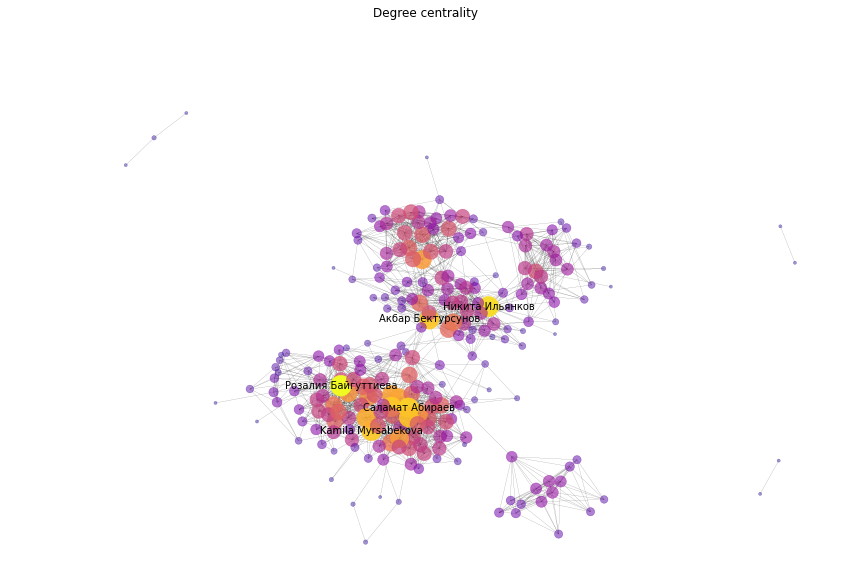

,ID,name,country,city,university,centrality
0,212827934,Розалия Байгуттиева,Россия,Москва,НИУ ВШЭ (ГУ-ВШЭ),0.172549
1,44566230,Никита Ильянков,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.160784
2,254103557,Саламат Абираев,Россия,Москва,,0.156863
3,180851860,Акбар Бектурсунов,,,,0.152941
4,193651936,Kamila Myrsabekova,Россия,,НИЯУ МИФИ,0.152941
5,195776078,Шамиль Эркинбеков,,,МФТИ (Физтех),0.152941
6,299037810,Эльдар Такутдинов,Кыргызстан,Бишкек,,0.149020
7,212233817,Тома Кучеренко,Россия,Москва,МФТИ (Физтех),0.141176
8,145229535,Yana Krasienko,Россия,Санкт-Петербург,Prague College,0.137255
9,194106132,Beksultan Tokochev,Кыргызстан,Бишкек,,0.137255


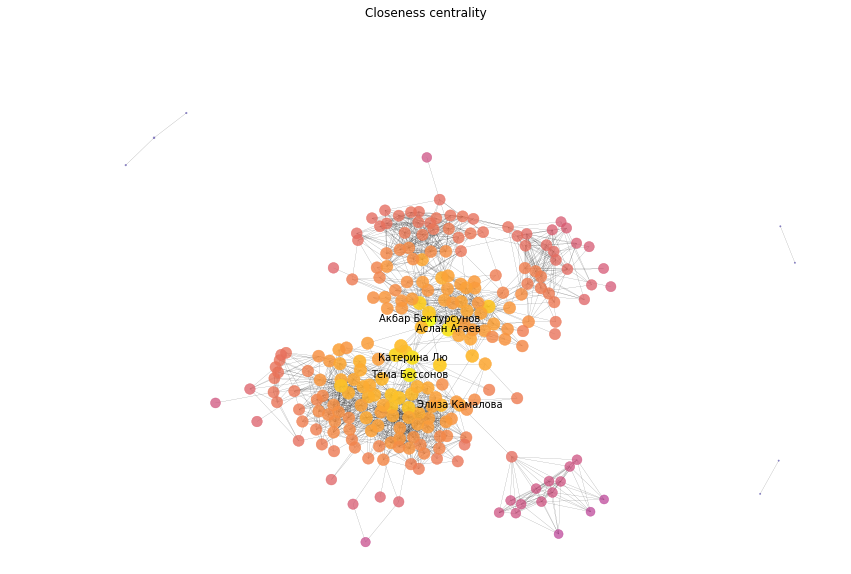

,ID,name,country,city,university,centrality
0,180851860,Акбар Бектурсунов,,,,0.188696
1,187633067,Катерина Лю,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.142891
2,198581295,Тёма Бессонов,Кыргызстан,Бишкек,НИУ ВШЭ (ГУ-ВШЭ),0.130045
3,176514567,Аслан Агаев,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.121400
4,206547273,Элиза Камалова,,,НИУ ВШЭ (ГУ-ВШЭ),0.108327
5,44566230,Никита Ильянков,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.101505
6,326807054,Jamshid Ruziev,Россия,Москва,НИУ ВШЭ (ГУ-ВШЭ),0.096466
7,198627994,Дмитрий Цю-Жен-Цин,Россия,Москва,НИУ ВШЭ (ГУ-ВШЭ),0.071754
8,477213600,Алимжан Заманбеков,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.071018
9,20026400,Егор Буркут,Россия,,,0.064896


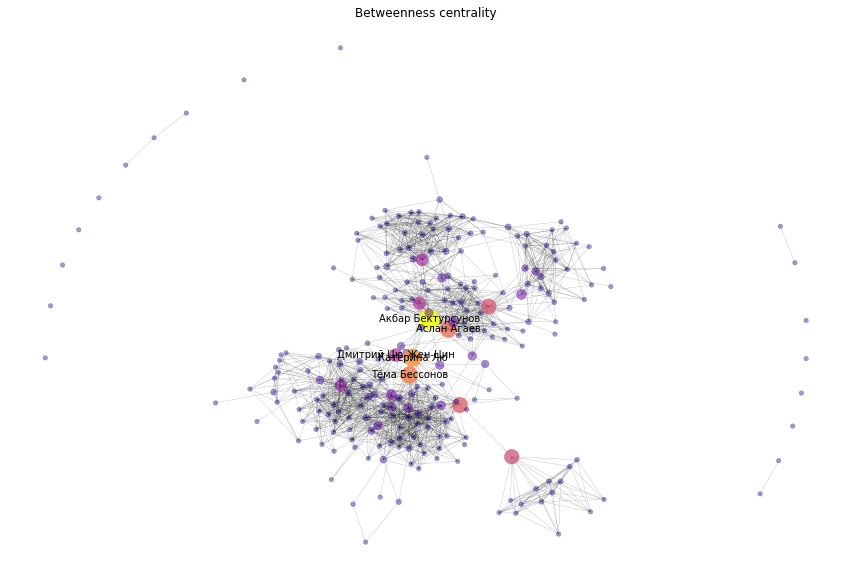

,ID,name,country,city,university,centrality
0,180851860,Акбар Бектурсунов,,,,0.389859
1,198581295,Тёма Бессонов,Кыргызстан,Бишкек,НИУ ВШЭ (ГУ-ВШЭ),0.375248
2,176514567,Аслан Агаев,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.370826
3,187633067,Катерина Лю,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.366507
4,198627994,Дмитрий Цю-Жен-Цин,Россия,Москва,НИУ ВШЭ (ГУ-ВШЭ),0.356425
5,477213600,Алимжан Заманбеков,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.350192
6,196659469,Christie Sen,Нидерланды,Amsterdam,,0.347979
7,179393742,Диана Юрковлянец,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.347430
8,232674626,Азиз Рахимов,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.344711
9,44566230,Никита Ильянков,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.342035


In [ ]:
cases = [['degree', 2500, 0, 'Degree centrality'], 
         ['closeness', 500, 0, 'Closeness centrality'], 
         ['betweenness', 2000, 20, 'Betweenness centrality']]
my_cmap = my_colormap('plasma', 0.4)
df = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df.to_dict())
for c_key, scale, bias, title in cases:
    label = top_name_center_dict[c_key]
    plt.figure(figsize=(15, 10))
    plt.title(title)
    nx.draw(g, 
            pos=pos,
            width=0.1,
            linewidths=0.5,
            cmap=my_cmap,
            node_size=cntrs[c_key]*scale + bias,
            node_color=cntrs[c_key])
    nx.draw_networkx_labels(g, pos=pos, labels=label, font_size=10)
    plt.show()
    display(top_dfs[c_key][:10])

1. **Degree Centrality:**  
Top nodes:

    1. Rozaliya Baiguttieva is my close friend from Kyrgyzstan, with whom I have many common friends. 
    2. Nikita Ilyankovs is my close friend from Latvia, with whom I studied and lived in Dorm in Saint Petersburg, so we have many close friends.
    3. Salamat Abiraev is my classmate from Bishkek, who now studies in Moscow and have many common friends
2. **Closeness Centrality**:
    1. Akbar Bektursunov is my friend from Kyrgyzstan, really sociable (connected to people from SPb Student Council, Dormitory, Kyrgyzstan)
    2. Katerina Lyu is my friend from Kyrgyzstan, share a lot common friends.
    3. Artyom Bessonov is my close friend, share a lot common friends.

2. **Betweenness Centrality**:
    1. Akbar Bektursunov is my friend from Kyrgyzstan, really sociable (connected to people from SPb Student Council, Dormitory, Kyrgyzstan)
    2. Artyom Bessonov is my close friend, share a lot common friends.
    3. Aslan Aghaev is my close friend, share a lot common friends.

#### Random Graphs

In [ ]:
n_nodes = len(lc.nodes())
avg_edges = np.array([d for n, d in lc.degree()]).mean()
prob = avg_edges/n_nodes

Erdos Renyi

In [ ]:
er_g = nx.fast_gnp_random_graph(n_nodes, prob, seed=1)

Barabasi Albert

In [ ]:
ba_g = nx.barabasi_albert_graph(n_nodes, int(avg_edges), seed=1)

Watts-Strogatz

In [ ]:
ws_g = nx.watts_strogatz_graph(n_nodes, int(avg_edges), p=0.1, seed=1)

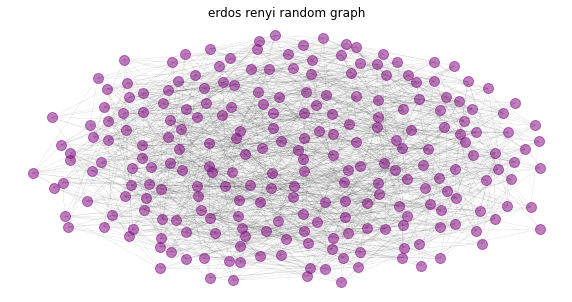

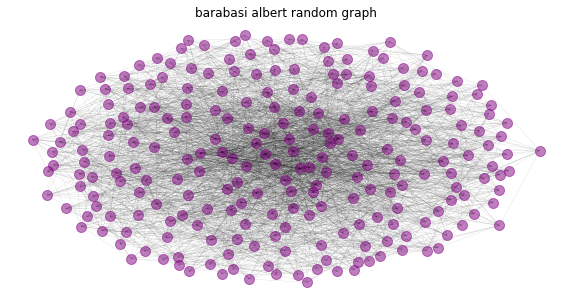

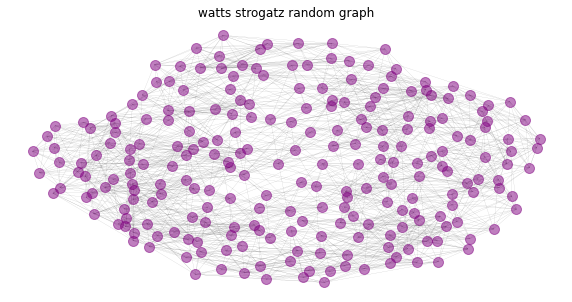

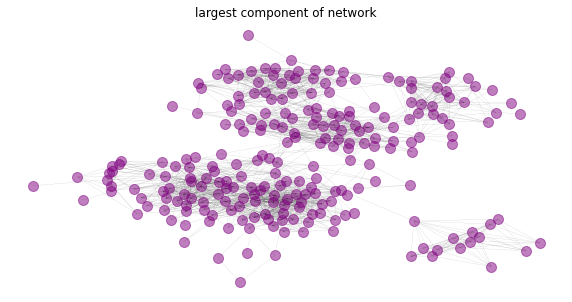

In [ ]:
rgs = {'erdos renyi random graph': er_g,
       'barabasi albert random graph':ba_g,
       'watts strogatz random graph':ws_g,
       'largest component of network': lc}

for rg_title, rg in rgs.items():
    df = pos_layout(rg)
    pos = nx.kamada_kawai_layout(rg, dist=df.to_dict())
    plt.figure(figsize=(10, 5))
    plt.title(rg_title)
    nx.draw(rg, 
            pos=pos,
            width=0.1,
            node_color='purple',
            node_size=100,
            alpha=0.5)
    plt.show()

Comparison

In [ ]:
import math

def graph_properties(g):
  diameter = nx.diameter(g)
  radius = nx.radius(g)
  avg_path = nx.average_shortest_path_length(g)
  clustering = nx.average_clustering(g)
  return {'diameter': diameter,
          'radius': radius,
          'avg shortest path': avg_path,
          'avg clustering': clustering}

def get_gk(expected, actual, sigma): 
  return {k: (math.exp(-(expected[k]-actual[k])**2/(2*sigma[k]**2))) for k in actual}


In [ ]:
sigma = {'diameter': 3,
          'radius': 1,
          'avg shortest path': 1,
          'avg clustering': 0.001}

lc_prop = graph_properties(rgs['largest component of network'])
gk_dict = {}
rg_prop_dict = {}

for rg_title, rg in rgs.items():
  rg_prop = graph_properties(rg)
  gk = get_gk(lc_prop, rg_prop, sigma)
  rg_prop_dict[rg_title] = rg_prop 
  gk_dict[rg_title] = gk

df1 = pd.DataFrame().from_dict(rg_prop_dict)
df1['sigma'] = pd.Series(sigma)

df2 = pd.DataFrame().from_dict(gk_dict)
df2 = df2.transpose()
df2['Total Score'] = df2.sum(axis=1)/4
df1.transpose()

,diameter,radius,avg shortest path,avg clustering
erdos renyi random graph,4.0,3.0,2.344361,0.059262
barabasi albert random graph,3.0,2.0,1.961954,0.201490
watts strogatz random graph,5.0,4.0,2.891182,0.523688
largest component of network,8.0,4.0,3.458923,0.546841
sigma,3.0,1.0,1.000000,0.001000


In [ ]:
df2

,diameter,radius,avg shortest path,avg clustering,Total Score
erdos renyi random graph,0.411112,0.606531,0.537340,0.000000e+00,0.388746
barabasi albert random graph,0.249352,0.135335,0.326131,0.000000e+00,0.177705
watts strogatz random graph,0.606531,1.000000,0.851152,3.950665e-117,0.614421
largest component of network,1.000000,1.000000,1.000000,1.000000e+00,1.000000


Best model that describes my social network is watts strogatz model with score = 0.61441

#### PageRank

In [ ]:
def top10_pagerank(G, alpha):
    sort = sorted(list(nx.pagerank(G, alpha).items()), key=lambda x:x[1], reverse=True)
    ids, pr = zip(*sort)
    friend_names = [nx.get_node_attributes(G, 'name')[y] for y in ids]
    friend_sex = [nx.get_node_attributes(G, 'sex')[y] for y in ids]
    
    friend_country = [ast.literal_eval(nx.get_node_attributes(G, 'country')[y])['title']
                      if y in nx.get_node_attributes(G, 'country') 
                      else '' for y in ids]
    friend_city = [ast.literal_eval(nx.get_node_attributes(G, 'city')[y])['title']
                      if y in nx.get_node_attributes(G, 'city') 
                      else '' for y in ids]
    friend_uni = [nx.get_node_attributes(G, 'university_name')[y]
                      if y in nx.get_node_attributes(G, 'university_name') 
                      else '' for y in ids]
    return pd.DataFrame({'ID': ids,
                          "name": friend_names, 
                          "country": friend_country,
                          "city": friend_city,
                          "university": friend_uni,
                          "PageRank": pr})

,ID,name,country,city,university,PageRank
0,44566230,Никита Ильянков,Россия,Санкт-Петербург,СПбПУ Петра Великого (Политех),0.012332
1,180851860,Акбар Бектурсунов,,,,0.011469
2,212827934,Розалия Байгуттиева,Россия,Москва,НИУ ВШЭ (ГУ-ВШЭ),0.010935
3,20026400,Егор Буркут,Россия,,,0.008783
4,194106132,Beksultan Tokochev,Кыргызстан,Бишкек,,0.008671


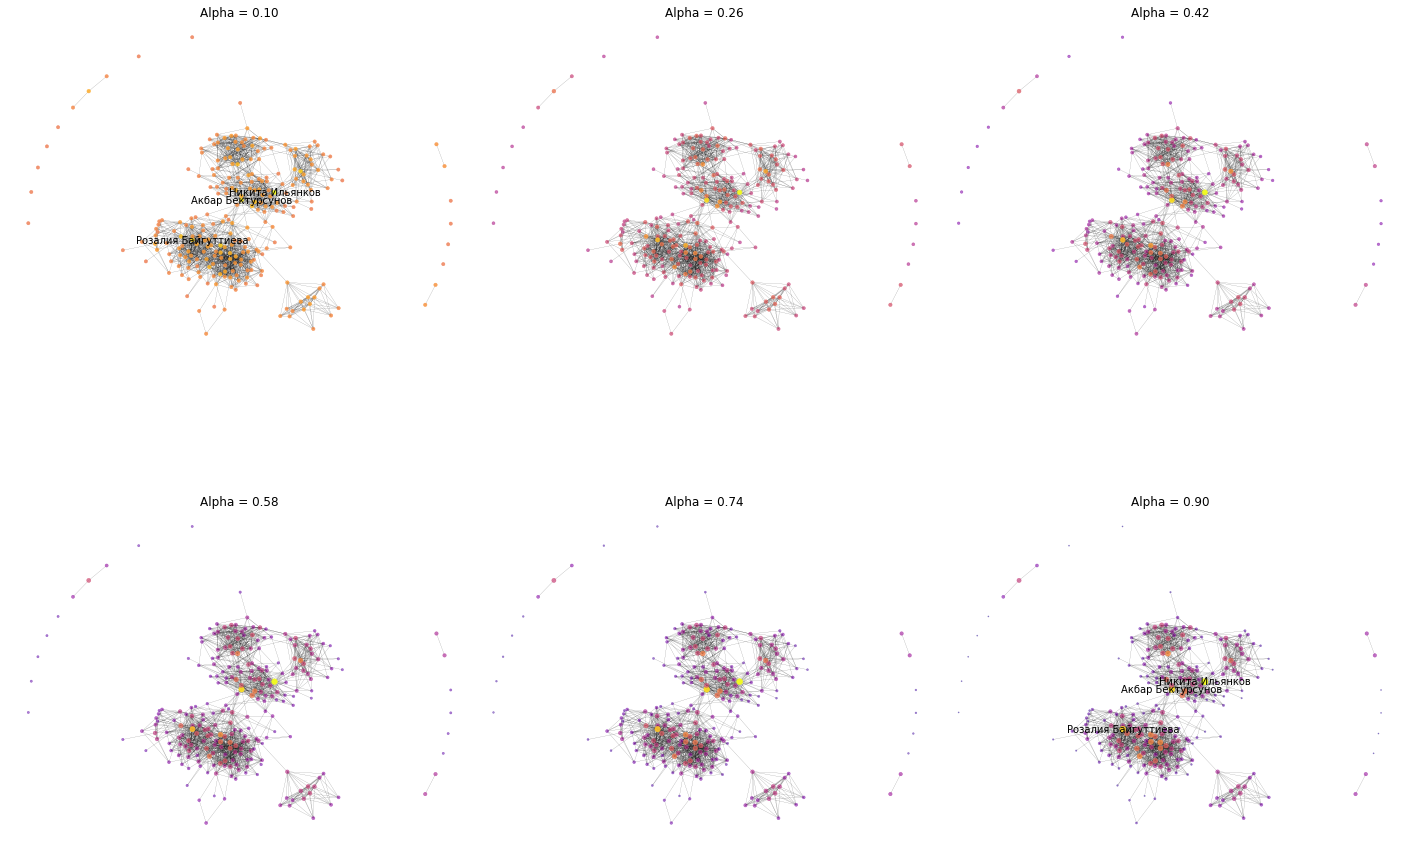

In [ ]:
my_cmap = my_colormap('plasma', 0.4)
PR_alphas = np.arange(0.1, 1, 0.16)

df = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df.to_dict())

fig, axes = plt.subplots(2,3, figsize=(25,15))
fig.subplots_adjust(hspace = .5, wspace=.001)
axe = axes.ravel()

for alpha, i in zip(PR_alphas,np.arange(0,6)):
    top_dfs_pr = top10_pagerank(g, alpha)
    top_name_pr = top_dfs_pr[['name']][:3].set_index(top_dfs_pr['ID'][:3]).to_dict()['name']
    PR = nx.pagerank(g, alpha)
    node_size = [pr*3e3 for node, pr in PR.items()]
    norm = plt.Normalize(0, max(PR.values()))
    node_colors = [my_cmap(norm(PR[node])) for node in g.nodes]


    axe[i].set_title('Alpha = {:.2f}'.format(alpha))
    nx.draw(g, 
            pos=pos,
            width=0.1,
            linewidths=0.5,
            node_size=node_size,
            node_color=node_colors,
            ax=axe[i]
            ) 
    if i in [0,5]:
      nx.draw_networkx_labels(g, 
                              pos=pos, 
                              labels=top_name_pr, 
                              font_size=10,
                              ax=axe[i])

display(top10_pagerank(g, 0.85)[:5])


Comparison with Centralities

In [ ]:
from scipy.stats import spearmanr

def pearson(a,b):
    return np.corrcoef(a, b)[0][1]
def spearman(a,b):
    return spearmanr(a, b)[0]

In [ ]:
corrvals = [
    ('Degree', list(nx.degree_centrality(g).values())),
    ('Closeness', list(nx.closeness_centrality(g).values())),
    ('Betweenness', list(nx.betweenness_centrality(g).values())),
    ('PageRank', list(nx.pagerank(g).values()))
]

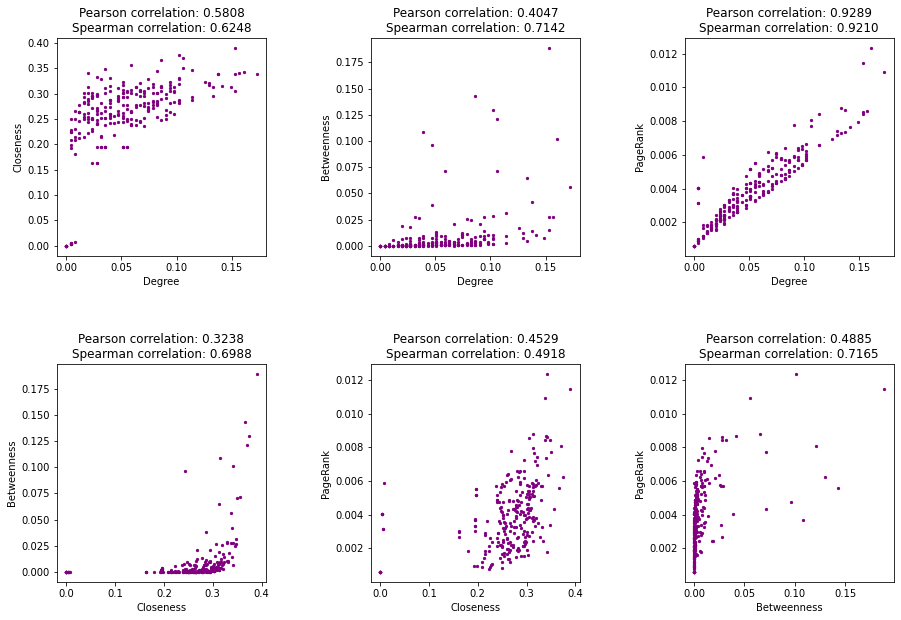

In [ ]:
plt.figure(figsize=(3*5, 2*5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
k = 1
for i in range(len(corrvals)):
    for j in range(i + 1, len(corrvals)):
        i_label, i_vals = corrvals[i]
        j_label, j_vals = corrvals[j]
        pcorrelation = pearson(i_vals, j_vals)
        scorrelation = spearman(i_vals, j_vals)
        plt.subplot(2, 3, k)
        plt.scatter(i_vals, j_vals, s=5, color='purple')
        plt.title('Pearson correlation: {:.4f}\nSpearman correlation: {:.4f}'.format(pcorrelation, scorrelation))
        plt.xlabel(i_label)
        plt.ylabel(j_label)
        k += 1

#### Assortative Mixing

In [ ]:
mod_dict = {}
mod_dict[" "] = ["Modularity", "Number of NaN"]
all_atr = set([k for n in g.nodes for k in g.nodes[n].keys()])
all_atr.difference_update({'name','nfriends','label'})
for attrib in all_atr:
  modularity = nx.attribute_assortativity_coefficient(g, attrib)
  mod_dict[attrib] = [modularity, g.order() - len(nx.get_node_attributes(g, attrib))]
                                        

In [ ]:
df_mod = pd.DataFrame().from_dict(mod_dict).set_index(' ')
df_mod

,city,country,university_name,sex
,,,,
Modularity,0.2687,0.187037,0.213754,0.041845
Number of NaN,50.0000,38.000000,48.000000,0.000000


In [ ]:
import seaborn as sns 
from collections import Counter

def atr_mapping(G, atr, threshold=2, only_names=True):
  mapping = {}
  atrs = nx.get_node_attributes(G, atr)
  occ_atr = [(v,occ) for v,occ in Counter(atrs.values()).most_common() if v != ''][:threshold]
  for (atr_val, occ), i in zip(occ_atr, range(0,len(occ_atr))):
    if only_names and '{' in atr_val:
      atr_val_name = ast.literal_eval(atr_val)['title']
      mapping[atr_val_name] = i
    else:
      mapping[atr_val] = i

  return mapping

def atr_mixing(G, atr, threshold=2):
  mapping_for_plot = atr_mapping(G, atr, threshold)
  mapping_for_func = atr_mapping(G, atr, threshold, only_names=False)
  atrs = nx.get_node_attributes(G, atr)
  mixing = nx.attribute_mixing_matrix(G, atr, mapping=mapping_for_func)

  return mixing, mapping_for_plot

(array([[0.67241379, 0.10474138],
        [0.10474138, 0.11810345]]), {'Кыргызстан': 1, 'Россия': 0})

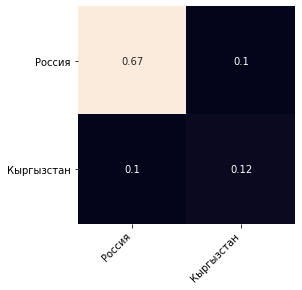

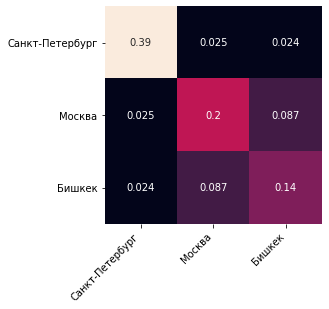

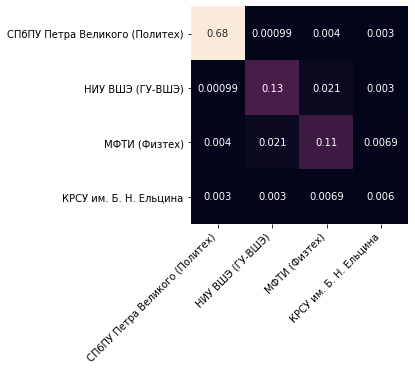

In [ ]:
atrs = {'country':2, 'city':3, 'university_name':4}

for k,v in atrs.items():
  fig = plt.figure(figsize=(4, 4))
  mixing, mapping = atr_mixing(g, k, v)
  hmap = sns.heatmap(
      mixing,
      cbar=False,
      annot=True,
      square=True, 
      ax)
  hmap.set_xticklabels(
      labels=[k for k,_ in mapping.items()], 
      rotation=45, 
      horizontalalignment='right')
  hmap.set_yticklabels(
      labels=[k for k,_ in mapping.items()], 
      rotation=0)
  plt.show()

#### Equivalence/Similarity 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.csgraph import reverse_cuthill_mckee

def sim_matrices(G):
  A = nx.to_numpy_array(G)
  pc = np.corrcoef(A)
  J = np.zeros(A.shape)
  for i, j, c in nx.jaccard_coefficient(nx.from_numpy_array(A)):
    J[i,j] = c 
    J[j,i] = 1-c 

  cs = cosine_similarity(A)
  
  return A, pc, J, cs

def cm_order(G):
  adj_matrix = nx.adjacency_matrix(G)

  return reverse_cuthill_mckee(adj_matrix)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


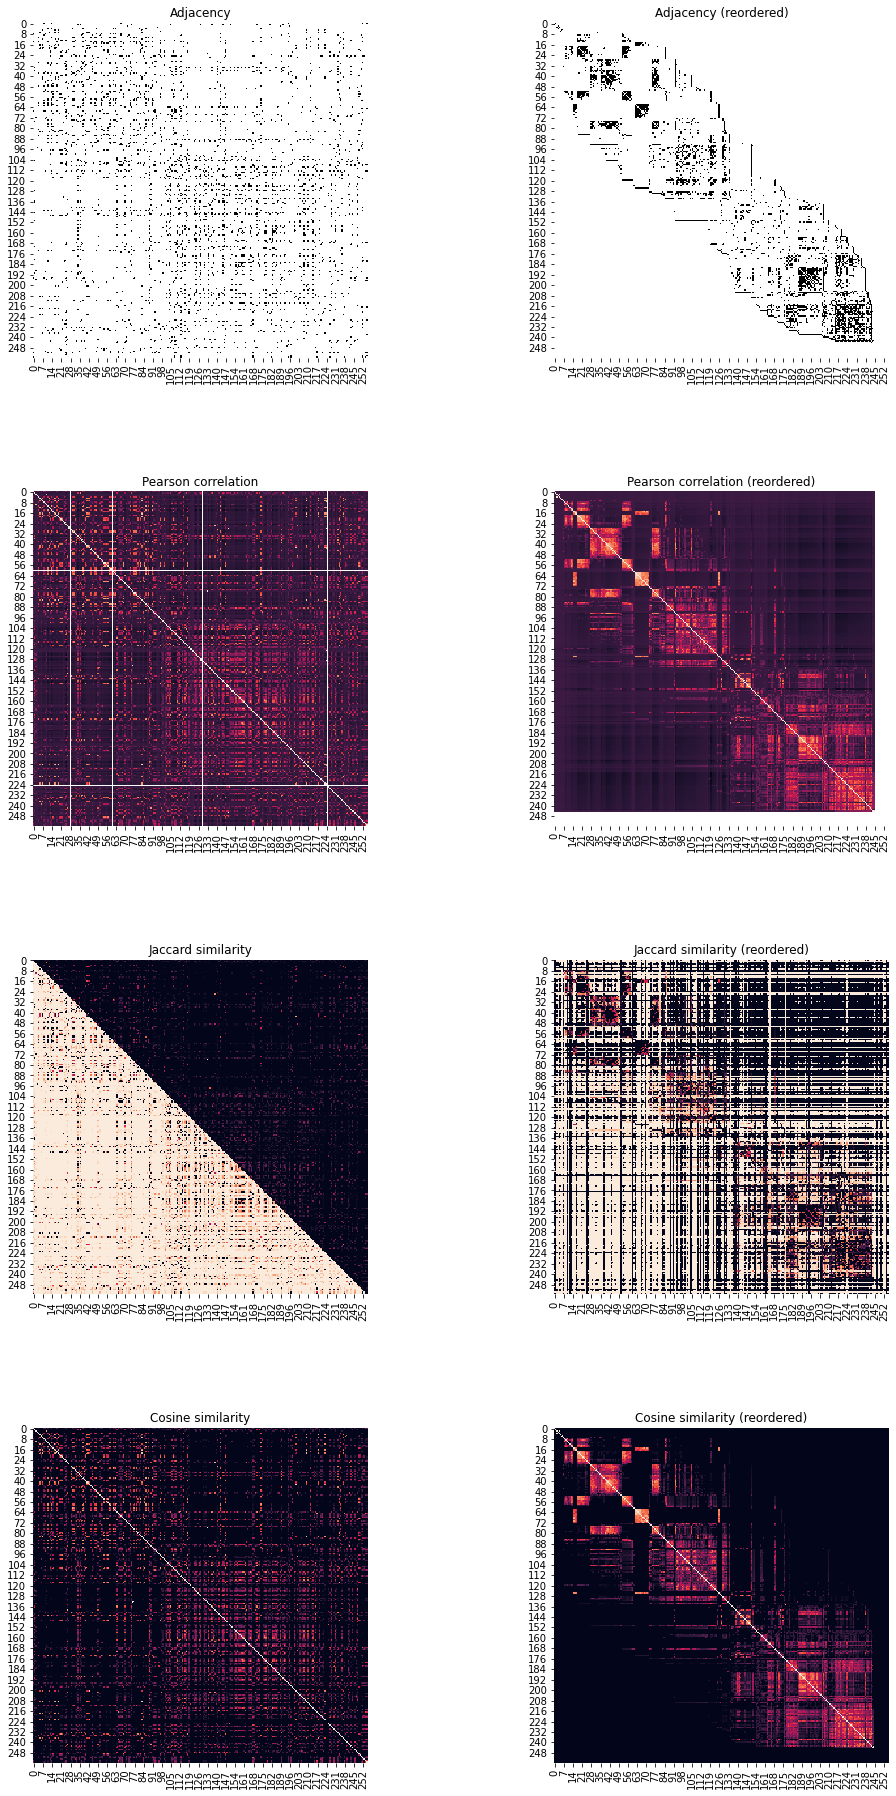

In [ ]:
A, corr, J, cos = sim_matrices(g)
order = cm_order(g)

fig = plt.figure(figsize=(16, 16*2))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

cases = [[1, A, plt.cm.Greys, 'Adjacency', range(len(nx.degree(g)))],
         [2, A, plt.cm.Greys, 'Adjacency (reordered)', order],
         [3, corr, None, 'Pearson correlation', range(len(nx.degree(g)))], 
         [4, corr, None, 'Pearson correlation (reordered)', order], 
         [5, J, None, 'Jaccard similarity', range(len(nx.degree(g)))], 
         [6, J, None, 'Jaccard similarity (reordered)', order], 
         [7, cos, None, 'Cosine similarity', range(len(nx.degree(g)))], 
         [8, cos, None, 'Cosine similarity (reordered)', order]]

for i, matrix, cmap, t, o in cases:
    plt.subplot(4, 2, i)
    hmap = sns.heatmap(
        matrix[np.ix_(o, o)],
        cmap=cmap,
        cbar=False,
        square=True)
    plt.title(t)

Let us find structural equivalent nodes.

In [ ]:
node_list = list(g.nodes())
adj_df =pd.DataFrame(A, index=node_list, columns=node_list)

In [ ]:
str_eq = [g.index.tolist() for _, g in adj_df.groupby(adj_df.columns.tolist()) if len(g.index) > 1]

In [ ]:
for se in str_eq:
  neighbors = [neighbor for neighbor in g.neighbors(se[0])]
  print('Friends:', end=' ')
  for fr in se:
    print(nx.get_node_attributes(g, 'name')[fr], end=' ')
  print('share', end=' ')
  if not neighbors:
    print('no friends\n')
  else:
    print(len(neighbors), 'friend {}\n'.format(nx.get_node_attributes(g, 'name')[neighbors[0]]))

Friends: Никита Пятков Александр Зеленин Лера Стрюкова Екатерина Ермакова Анита Чу Mira Amanturova Nariman Turebayev Екатерина Аматова Кэтрин Морланд Илья Горборуков Владимир Киселев share no friends

Friends: Олеся Литвинова Тим Игамов share 1 friend Артем Герасимов



People with no friends in social network are not structural equivalent.  
So there are only two structural equivalent nodes.